In [3]:
import sympy as sp
import pylab as pl
from jhc.AuxDisplay import *
from itertools import product
import jhc.iga

import jhc.nurbs as nb

sp.init_printing(use_latex=True)

%matplotlib inline

In [2]:
x = sp.Symbol('x')

# 1  - Bases NURBS

### 1.1 - Exemplo de integração e derivação das funções bases

# 2 - Testando a resolução do problema com vários parâmetros

In [3]:
rho, g, E, L = 1, 1, 1, 2

In [4]:
def teste(n, p, cp_x, knt_spans, u, knots=None):
    
    # --------------   NURBS   -------------------
    x = sp.Symbol('x')

    if knots is None:
        knots = nb.clamped_uniform_knots(0, 1, n, p)
    displayEq('\Xi', sp.Array(knots))

    B = nb.BasesNURBS(knots, p)
#     B.plotBase()
    N = B.N[-1]
    
    # ----------------   IGA   ---------------------
    
    problema = iga.Problema(B, p, x)
    problema.construir_matriz_global(cp_x, knt_spans)
    u_h = problema.solve()
    displayEq('u_h', u_h)

    # solução analítica
    eixo = pl.linspace(0, 2, 50)
    pl.plot(eixo, u(eixo), 'k-', label='Solução analítica')

    problema.plotSolucao()
#     problema.plotDiffSolucao()
    
    return problema

## 2.1 - Caso linear

### 2.1.1 Linear com três pontos

\Xi  = [0  0.0  0.5  1.0  1]

knot_span[0.000000, 0.500000]
knot_span[0.500000, 1.000000]


u_h  = ⎡ 0 ⎤
       ⎢   ⎥
       ⎢1.5⎥
       ⎢   ⎥
       ⎣2.0⎦

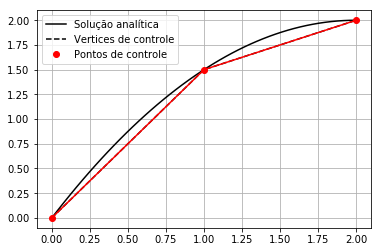

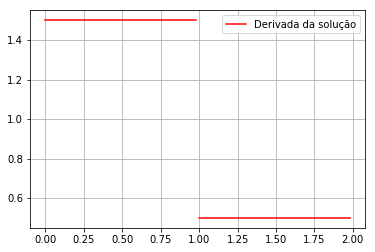

In [5]:
n = 3
p = 1

cp_x = (0.0, 1.0, 2.0)
knt_spans = [(0, 2), (2, 4)]

u = lambda x: rho*g / E * (L * x - x**2/2)

_ = teste(n, p, cp_x, knt_spans, u)

### 2.1.2 Linear com quatro pontos

\Xi  = [0  0.0  0.333333333333333  0.666666666666667  1.0  1]

knot_span[0.000000, 0.333333]
knot_span[0.333333, 0.666667]
knot_span[0.666667, 1.000000]


u_h  = ⎡   0   ⎤
       ⎢       ⎥
       ⎢1.21875⎥
       ⎢       ⎥
       ⎢ 1.875 ⎥
       ⎢       ⎥
       ⎣  2.0  ⎦

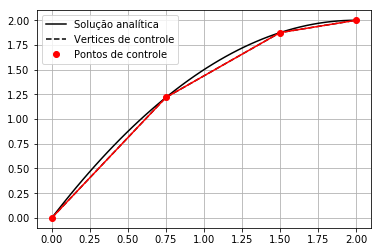

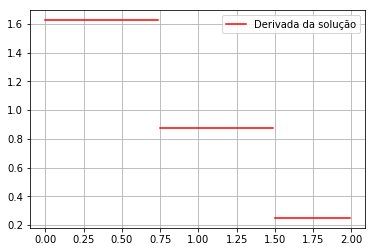

In [6]:
n = 4
p = 1

cp_x = (0.0, 0.75, 1.5, 2.0)
knt_spans = [(0, 2), (2, 3), (3, 5)]

u = lambda x: rho*g / E * (L * x - x**2/2)

_ = teste(n, p, cp_x, knt_spans, u)

### 2.1.3 Linear com cinco pontos

\Xi  = [0  0.0  0.25  0.5  0.75  1.0  1]

knot_span[0.000000, 0.250000]
knot_span[0.250000, 0.500000]
knot_span[0.500000, 0.750000]
knot_span[0.750000, 1.000000]


u_h  = ⎡  0  ⎤
       ⎢     ⎥
       ⎢0.875⎥
       ⎢     ⎥
       ⎢ 1.5 ⎥
       ⎢     ⎥
       ⎢1.875⎥
       ⎢     ⎥
       ⎣ 2.0 ⎦

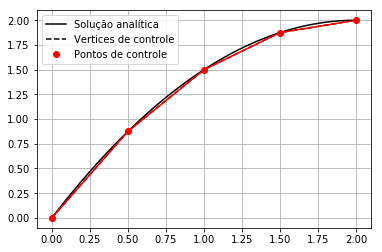

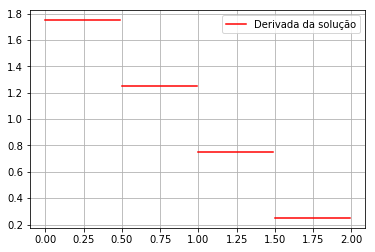

In [7]:
n = 5
p = 1

cp_x = (0.0, 0.5, 1.0, 1.5, 2.0)
knt_spans = [(0, 2), (2, 3), (3, 4), (4, 6)]

u = lambda x: rho*g / E * (L * x - x**2/2)

_ = teste(n, p, cp_x, knt_spans, u)

## 2.2 - Caso Quadrático

### 2.2.1 Quadrático com três pontos

\Xi  = [0  0  0.0  1.0  1  1]

knot_span[0.000000, 1.000000]


u_h  = ⎡ 0 ⎤
       ⎢   ⎥
       ⎢2.0⎥
       ⎢   ⎥
       ⎣2.0⎦

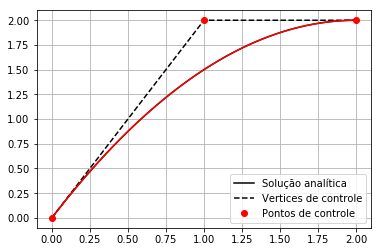

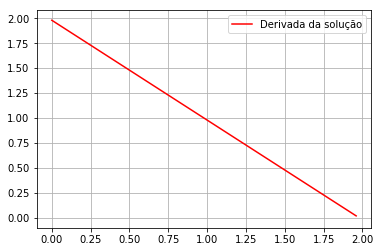

In [8]:
n = 3
p = 2

cp_x = (0.0, 1.0, 2.0)
knt_spans = [(0, 5)]

u = lambda x: rho*g / E * (L * x - x**2/2)

_ = teste(n, p, cp_x, knt_spans, u)

### 2.2.2 Quadrático com quatro pontos

\Xi  = [0  0  0.0  0.5  1.0  1  1]

knot_span[0.000000, 0.500000]
knot_span[0.500000, 1.000000]


u_h  = ⎡ 0 ⎤
       ⎢   ⎥
       ⎢1.0⎥
       ⎢   ⎥
       ⎢2.0⎥
       ⎢   ⎥
       ⎣2.0⎦

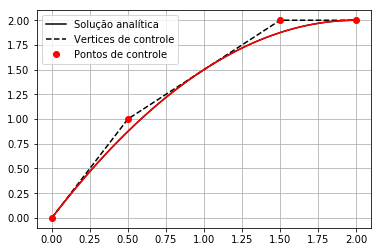

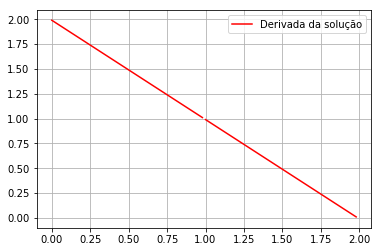

In [9]:
n = 4
p = 2

# cp_x = (0.0, 0.1, 0.5, 2.0) # <--- péssima escolha
# cp_x = (0.0, 0.75, 1.25, 2.0) # <--- má escolha
cp_x = (0.0, 0.5, 1.5, 2.0)
knt_spans = [(0, 3), (3, 6)]

u = lambda x: rho*g / E * (L * x - x**2/2)

_ = teste(n, p, cp_x, knt_spans, u)

### 2.2.3 Quadrático com cinco pontos

\Xi  = [0  0  0.0  0.333333333333333  0.666666666666667  1.0  1  1]

knot_span[0.000000, 0.333333]
knot_span[0.333333, 0.666667]
knot_span[0.666667, 1.000000]


u_h  = ⎡        0        ⎤
       ⎢                 ⎥
       ⎢0.933774599249837⎥
       ⎢                 ⎥
       ⎢1.51748770037508 ⎥
       ⎢                 ⎥
       ⎢1.93377459924984 ⎥
       ⎢                 ⎥
       ⎣       2.0       ⎦

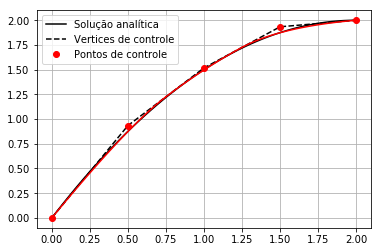

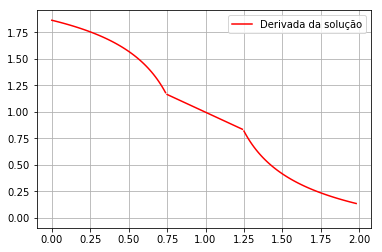

In [10]:
n = 5
p = 2

knots = (0, 0, 0, 1/3, 2/3, 1, 1, 1)
cp_x = (0.0, 0.5, 1.0, 1.5, 2.0)
knt_spans = [(0, 3), (3, 4), (4, 7)]

u = lambda x: rho*g / E * (L * x - x**2/2)

_ = teste(n, p, cp_x, knt_spans, u)

## [Rascunhos...]